In [1]:
#_second_dataset_classifications_with_proposed_model_on_PhDThesis_for_wordcloud

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
!pip install textblob
import textblob
from textblob import TextBlob

In [28]:
#VISUALIATION_Matplot ve Wordcloud
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
#######_PRODUCT_NEGATIVE_WORDCLOUD_######

In [110]:
boosted_productservicelexicon_onlyproduct_and_negativewords3=["abur cubur"," acı ","adet","ağız tadı","altın günü yiyecek","ana yemek","aperatif","çok yağlı", "ayran","azıcık","baharat"," bal ","bayat","besin","biber","bisküvi"," bol ","bozuk","böcek","börek","buruk","donmuş","büyük boy","canı çek",
                               "cips","çeşni","çevirm","çıtır","pişmemiş","çoban"," çöp ","çörek","dağıl","damak tadı","dolma","domates","duble","doym",
                               "doyurucu","dünden kalan","dürüm"," ekle ","ekşimiş"," ekmek "," eksik ","ev yapımı"," erzak","eşantiyon"," etli"," etsiz",
                               "fast food","futuristik","garnitür","gevrek","gıda","gluten","gram","gurme","hafif yemek","hamur","haram","hastası","hatay usul","havyar",
                               "hazır yemek","helal"," hoş "," ısıt","ıspanak","iade","içecek"," içki ","içli köfte","ikram","kadınbudu","kalın hamur","karbonhidrat","karışık","kaşarlı",
                               "katık","kavurma","kayış","köpek yem","kestane","ketçap"," kıl ","kıtır","kıyma","kızarmış","kızartm","kilo ","kişi başı","klasik","kokan","kokm","koku",
                               "konserve","köfte","kömür","kurt"," kuru ","kusm","kuşbaşı","küçük","küflü","lastik","latif","latte","lezzetli","lezzetsiz","lokma",
                               "lokum","lüfer","makarna","martı eti","marul"," maya","mayonez","meşrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","öğün","ölçü",
                               "patlıcan","peynir","pilav","pişmiş","pizza","poğaça","porsiyon","pörsüm","reçel"," saç ","sağlıklı","sağlıksız","salata","salça","saman",
                               "sarımsak","sası","sebze","sıcacık","sinek","soğan","soğuk","son kullanma tarih"," sos ","sucuk","sufle","sulu","şalgam","şeker","şerbet","taraftar",
                               "taş ","tatlı","tatsız","tavuk","taze","tereyağ","turşu","tuzlu","tuzsuz","ufak","urfa","ürün","vegan","vejetaryan","vıcık","yağı don","yağlı",
                               "yağsız","yanık","yanmış","yapışmış","yarım","yemiş","yeşillik","yöresel","yudum","yumurta","zehir","zevkli","lira","3d secure","abart","abes","abuk sabuk","acayip","acemi"," acı ","acitasyon"," açık ","açlık"," adi "," ağır","ağlıcam","ahlaksız"," aksak"," aksi ","alakasız","alt tarafı","sövmek",
             "andaval","anksiyete","anlamsız","arıza","asılsız","aşağı","aşınmış","aşırı yağlı","ayar ol"," ayıp"," ayı "," azal","azar ye"," azarla","bağlanmak","bahane","balık hafıza","balon","yasak","basit","başarısız"," bat","bayağı","bayat","baygın","beceriksiz","beddua","beğenm","beklet",
             "bela","bencil","bitmiştir","berbat","bereket","beter","beyhude","beyinsiz","bez","bıkmak","bilgisiz","bilinçsiz"," bilme","bin pişman","daha asla","bitkin","blokl"," bok ","bomboş","boşuna","botla","boykot","bozuk","böcek"," bulan","donmuş","büyütme",
             "cahil","camış","cansız","cenabet","cennet","cereme","cesaretim yok","ceza"," cılk","crash","çakal","çamur","çekin","çelişki","çıkar","çıkış","çıldır","pişmemiş","çirkin","çok kötü","çökmüş"," çöp ","çürü","dağ başı","dağınık","dalgın","dandik"," dar ","dayanma sınır","dedikodu","değersiz",
             "deli ol","dengesiz","dert"," dışı","diken üst","doym","dökülmüş","dönek","dram","duygu sömür","duyarsız","düğüm","düşman","düşük","düşüncesiz","düzenbaz","düzensiz","edepsiz"," eksik ","eleştiri","enayi"," engel","erimiş"," ertele"," eşek ","eyvah"," ezik","fake","fani","fasa fiso","faydasız","fazla",
             "felaket","feleğim şaş","fena","fırsatç","fiyasko","gaflet","gazabına uğra","geber","gecik","geçici","gelm","gereksiz","gergin","getirmek","gıcık","gına gel","görgüsüz","gözü karart","gudubet","hadsiz","hak etmiyor","hakaret","haksız","halt","hamur","haram","hatalı","hayal kırık","haysiyetsiz","hayvan",
             "hazetm","hikaye"," uzak","ıslanm","ıssız","iade","ibne","iflah olm","iflas","iğren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," istemiyor","istismar","isyan","işkence","işsiz","iştahsız"," itici","iyi değil","kaba ","kafayı ye","kahrolsun","kalas","kaldık",
             " kalm","kan emici","kanser","kapısının önü","kara kara düşün","kara liste","karışık","kaybet","kayış","kazık","kendimi tut","keşke"," kını","kırıl","kıtlık","kifayetsiz","kilo ","kirli","kitle","kokan","kokm","kopya","korkunç","köle","kömür","kötü ","köylü"," kuru ","kusm","kusur","küçük","küflü","küstah"," laf ",
             "lakayıt","lanet","lastik","leke"," leş ","lezzetsiz","lüzumsuz","mağdur","mahsur","mantıksız","manyak","maraz doğ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","orospu","ortadan kaldır","oyala","öküz"," ölü ","özensiz",
             "özür","pahalı","panik","paranoyak","pezevenk"," pis ","pişman","problem","psikopat","rasgele","reddet","rezil","risk","rötar","ruh hasta","saçma"," saç ","sağlıksız","sahte","sakat","sakınca","salak","salla","saman","sası","savsak","saygısız","sebepsiz","serseri","sert","ses seda yok","sıfır","sıkıl","sıkıntı","sıradan",
             "sızlan","sinek","sipariş hata","sipariş iptal","sitem","sivrisinek","skandal","soğukta","soğuk","sorm","sorumsuz","sorun","sömür","sözde"," suç","sürün","şaka","şans gülm","şerefsiz","şeytan","şımarık","şikayet","şişir","şişko patates","şopar","şüpheli","taciz","tadı yok","takat","talan et","talihsiz","tasa ",
             "taş ","tatava yap","tatsız","tehlike","tekel","telaş","tembel","terbiyesiz","ters","tırs","toz","trip","tuzsuz","tüketme","tükür","tüy","uçurum","ufak","uğraş","ukala"," ulan","ulaşam","umrunda değil","umursam","unutmuş","unutul"," usan"," utan","uyar","uydur","ürkütücü"," üşen","üzgün",
             "vahim","vasat","vazgeç","verem","verimsiz","vıcık","vicdan azab","vicdansız","vizyonsuz","yağı don","yağsız","yalaka","yalan","yanlış","yamuk","yanık","yanıl","yapışmış","yaram","yaratık","yaşlan","yavaş","yavşak","yazık","yemek yok","yemiyo","yerlerde","yeter artık","yetersiz",
             "yorgun","zarar ","zehir","zevksiz","zıkkım","ziyan","zoraki"]
boosted_productservicelexicon_onlyproduct_and_negativewords3

['abur cubur',
 ' acı ',
 'adet',
 'ağız tadı',
 'altın günü yiyecek',
 'ana yemek',
 'aperatif',
 'çok yağlı',
 'ayran',
 'azıcık',
 'baharat',
 ' bal ',
 'bayat',
 'besin',
 'biber',
 'bisküvi',
 ' bol ',
 'bozuk',
 'böcek',
 'börek',
 'buruk',
 'donmuş',
 'büyük boy',
 'canı çek',
 'cips',
 'çeşni',
 'çevirm',
 'çıtır',
 'pişmemiş',
 'çoban',
 ' çöp ',
 'çörek',
 'dağıl',
 'damak tadı',
 'dolma',
 'domates',
 'duble',
 'doym',
 'doyurucu',
 'dünden kalan',
 'dürüm',
 ' ekle ',
 'ekşimiş',
 ' ekmek ',
 ' eksik ',
 'ev yapımı',
 ' erzak',
 'eşantiyon',
 ' etli',
 ' etsiz',
 'fast food',
 'futuristik',
 'garnitür',
 'gevrek',
 'gıda',
 'gluten',
 'gram',
 'gurme',
 'hafif yemek',
 'hamur',
 'haram',
 'hastası',
 'hatay usul',
 'havyar',
 'hazır yemek',
 'helal',
 ' hoş ',
 ' ısıt',
 'ıspanak',
 'iade',
 'içecek',
 ' içki ',
 'içli köfte',
 'ikram',
 'kadınbudu',
 'kalın hamur',
 'karbonhidrat',
 'karışık',
 'kaşarlı',
 'katık',
 'kavurma',
 'kayış',
 'köpek yem',
 'kestane',
 'ketçap',

In [123]:
#1_import_the_file_and_transform_dataframe_format
read_file=pd.read_excel(r"5_product_negative_tweets_of_second_dataset.xlsx")
df_product_negative_tweets3=read_file.to_csv(r"5_product_negative.csv", index=None)
df_product_negative_tweets3=pd.read_csv("5_product_negative.csv")
df_product_negative_tweets3=pd.DataFrame(df_product_negative_tweets3)
df_product_negative_tweets3

,Product negatives_tweets
0,Temassız teslimatla yemeksepeti'nden sipariş v...
1,Nitekim 22:20 de yani 1 saat sonra buz gibi bi...
2,Hayatta şansım olmadığını bir kere daha hatırl...
3,Bana bütün yiyeceklerimi hazırlayacak biri ols...
4,@huseyinnyazici Bide utanmadan eve sipariş var...
...,...
351,@yemeksepeti Ben yemek sepetinden menülere bak...
352,Yemek sepetinden Adana dürüm sipariş ettim ve ...
353,"Bizler bir tık'la ayağımıza yemek çağırırken, ..."
354,@GetirYemek Doyuran menüymüs sahtekar hep bunl...


In [124]:
df_product_negative_tweets4=df_product_negative_tweets3.copy()
df_product_negative_tweets5=df_product_negative_tweets4.copy()
df_product_negative_tweets5["Product negatives_tweets"]=df_product_negative_tweets5["Product negatives_tweets"][:].astype(str)
df_product_negative_tweets5["Product negatives_tweets_word"]=df_product_negative_tweets5["Product negatives_tweets"].apply(lambda x: TextBlob(x).words)
df_product_negative_tweets5_characterword_count=df_product_negative_tweets5.copy()
df_product_negative_tweets5_characterword_count["Character_Number"]=df_product_negative_tweets2_characterword_count["Product negatives_tweets"].str.len()
df_product_negative_tweets5_characterword_count["Word_Number"]=df_product_negative_tweets2_characterword_count["Product negatives_tweets"].apply(
    lambda x:len(str(x).split(" ")))
for i in boosted_productservicelexicon_onlyproduct_and_negativewords3:
    df_product_negative_tweets5_characterword_count[i]=df_product_negative_tweets5_characterword_count["Product negatives_tweets"].str.count(i)
    df_product_negative_tweets5_characterword_count
df_product_negative_tweets5_characterword_count

/var/folders/xg/30080dtj3glgwllkfn5zhjl40000gn/T/ipykernel_18333/528271181.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_product_negative_tweets5_characterword_count[i]=df_product_negative_tweets5_characterword_count["Product negatives_tweets"].str.count(i)
/var/folders/xg/30080dtj3glgwllkfn5zhjl40000gn/T/ipykernel_18333/528271181.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_product_negative_tweets5_characterword_count[i]=df_product_negative_tweets5_characterword_count["Product negatives_tweets"].str.count(i

,Product negatives_tweets,Product negatives_tweets_word,Character_Number,Word_Number,abur cubur,acı,adet,ağız tadı,altın günü yiyecek,ana yemek,...,yemiyo,yerlerde,yeter artık,yetersiz,yorgun,zarar,zevksiz,zıkkım,ziyan,zoraki
0,Temassız teslimatla yemeksepeti'nden sipariş v...,"[Temassız, teslimatla, yemeksepeti'nden, sipar...",196,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nitekim 22:20 de yani 1 saat sonra buz gibi bi...,"[Nitekim, 22:20, de, yani, 1, saat, sonra, buz...",269,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayatta şansım olmadığını bir kere daha hatırl...,"[Hayatta, şansım, olmadığını, bir, kere, daha,...",201,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bana bütün yiyeceklerimi hazırlayacak biri ols...,"[Bana, bütün, yiyeceklerimi, hazırlayacak, bir...",197,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,@huseyinnyazici Bide utanmadan eve sipariş var...,"[huseyinnyazici, Bide, utanmadan, eve, sipariş...",126,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,@yemeksepeti Ben yemek sepetinden menülere bak...,"[yemeksepeti, Ben, yemek, sepetinden, menülere...",125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,Yemek sepetinden Adana dürüm sipariş ettim ve ...,"[Yemek, sepetinden, Adana, dürüm, sipariş, ett...",164,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,"Bizler bir tık'la ayağımıza yemek çağırırken, ...","[Bizler, bir, tık'la, ayağımıza, yemek, çağırı...",278,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,@GetirYemek Doyuran menüymüs sahtekar hep bunl...,"[GetirYemek, Doyuran, menüymüs, sahtekar, hep,...",236,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_product_negative_tweets5_characterword_count1=df_product_negative_tweets5_characterword_count.iloc[:,4:553]
df_product_negative_tweets5_characterword_count1

,abur cubur,acı,adet,ağız tadı,altın günü yiyecek,ana yemek,aperatif,çok yağlı,ayran,azıcık,...,yemiyo,yerlerde,yeter artık,yetersiz,yorgun,zarar,zevksiz,zıkkım,ziyan,zoraki
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
column_sums_df_product_negative_tweets5_characterword_count1 = df_product_negative_tweets5_characterword_count1.sum()

print("Sum of each column:")
print(column_sums_df_product_negative_tweets5_characterword_count1)

Sum of each column:
abur cubur             2
 acı                  12
adet                   5
ağız tadı              2
altın günü yiyecek     0
                      ..
zarar                  0
zevksiz                0
zıkkım                 1
ziyan                  1
zoraki                 0
Length: 548, dtype: int64


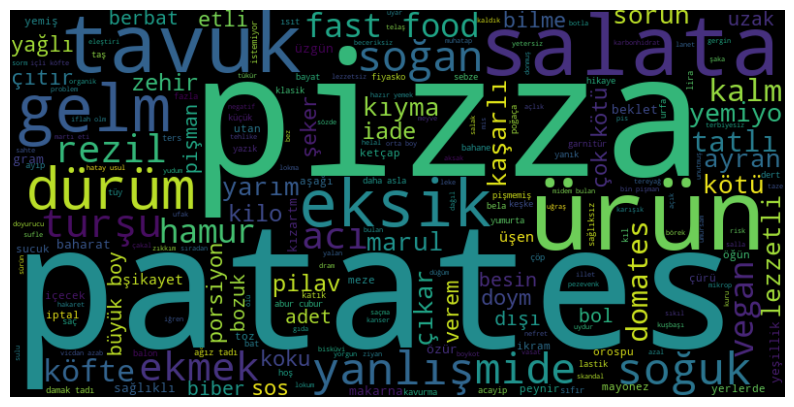

In [129]:
import matplotlib.pyplot as plt
wc = WordCloud(width=800, height=400, max_words=400).generate_from_frequencies(column_sums_df_product_negative_tweets5_characterword_count1)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#in_the_above_code_you_can_change_the_lexicon_and_you_you_can_get_the_other_wordclouds_for_productpositive_
#servicepositive_servicenegative_by_using_foldersname_are_listed_below
#2_service_positive_tweets_of_second_dataset
#3_service_negative_tweets_of_second_dataset
#4_product_positive_tweets_of_second_dataset

In [ ]:
#######_4_product_positive_tweets_of_second_dataset_######

In [1]:
boosted_productservicelexicon_onlyproduct_and_positivewords=["abur cubur"," acı ","adet","ağız tadı","altın günü yiyecek","ana yemek","aperatif","çok yağlı", "ayran","azıcık","baharat"," bal ","bayat","besin","biber","bisküvi"," bol ","bozuk","böcek","börek","buruk","donmuş","büyük boy","canı çek",
                               "cips","çeşni","çevirm","çıtır","pişmemiş","çoban"," çöp ","çörek","dağıl","damak tadı","dolma","domates","duble","doym",
                               "doyurucu","dünden kalan","dürüm"," ekle ","ekşimiş"," ekmek "," eksik ","ev yapımı"," erzak","eşantiyon"," etli"," etsiz",
                               "fast food","futuristik","garnitür","gevrek","gıda","gluten","gram","gurme","hafif yemek","hamur","haram","hastası","hatay usul","havyar",
                               "hazır yemek","helal"," hoş "," ısıt","ıspanak","iade","içecek"," içki ","içli köfte","ikram","kadınbudu","kalın hamur","karbonhidrat","karışık","kaşarlı",
                               "katık","kavurma","kayış","köpek yem","kestane","ketçap"," kıl ","kıtır","kıyma","kızarmış","kızartm","kilo ","kişi başı","klasik","kokan","kokm","koku",
                               "konserve","köfte","kömür","kurt"," kuru ","kusm","kuşbaşı","küçük","küflü","lastik","latif","latte","lezzetli","lezzetsiz","lokma",
                               "lokum","lüfer","makarna","martı eti","marul"," maya","mayonez","meşrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","öğün","ölçü",
                               "patates","patlıcan","peynir","pide","pilav","pişmiş","pizza","poğaça","porsiyon","pörsüm","reçel"," saç ","sağlıklı","sağlıksız","salata","salça","saman",
                               "sarımsak","sası","sebze","sıcacık","sinek","soğan","soğuk","son kullanma tarih"," sos ","sucuk","sufle","sulu","şalgam","şeker","şerbet","taraftar",
                               "taş ","tatlı","tatsız","tavuk","taze","tereyağ","turşu","tuzlu","tuzsuz","ufak","urfa","ürün","vegan","vejetaryan","vıcık","yağı don","yağlı",
                               "yağsız","yanık","yanmış","yapışmış","yarım","yemiş","yeşillik","yöresel","yudum","yumurta","zehir","zevkli","lira","3d secure","10 puan","number one","10/10","6/10","8/10","acar","acele","adalet","aferin","afiyet","ağzımın su","ak pak","aksiyon","alakalı"," alfa","anında","anlamlı","aralıksız","arkadaş"," artı","arzu"," asıl "," aşık","aşer"," aşkın","avantajlı",
             "bağımlı","bahşiş","başarılı","başlıca","bayıl","bayram"," baz ","bebeğim","beğeni","beklenti","beyefendi","bilerek","bilgili","bilinçli","boğazımdan geçm"," bol ","bravo","buruk","canı çek","cansın","centilmen","ciddi","çare","çekiliş","çeşni","çık hayat","çılgın","çok iyi",
             "çözüm","daima","dayanışma","değerli","demlenmiş","dengeli","derle","derman","destek","devamlı","dikkatli","dilek","doğal","doğru","dolu","doyam","dua","duyarlı","dürüst","düşünceli","düzelt","düzenli","efendi","eğitim","eksiksiz","ekstra","ev yemeği","eline sağlık"," esas ",
             " esen "," eşit"," etkili","faydalı","fazilet","gayet","gerçek ","gerekli"," göm","gönül","görev","görgülü","gurur","güven","güzel","hakikaten ","hakkıyla","halis","hapır hupur","hasret kal","hassas","hastası","havalı","hayati","hayırlısı","hayran","hediye",
             "helal","hemen","heves","hijyen"," hoş ","hukuk","huzur","içim","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inşallah"," istiyor","işbirli","iştahlı","itibar","iyi fikir","iyi puan","iyi yemek","iyilik"," izin","jest",
             "joker","kabul","kalp","kalıcı","kaliteli","kanka","kardeşim","karlı","kazan","kefil","kesintisiz","keyif","kızarmış","kibar","kolay","kral","kurban","latif","layık","lokum","makbul","mantıklı","medeni","memnuniyet","merhamet","mesut","meşhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteşem","mutlu","mükemmel","müsaade","müsait ","nazik", "nitelikli","nizam","olağanüstü","olumlu","onay","onur","optimum","otomatik","öncelik","önem","öner","özel","özenli","patla","pişkin","pişmiş"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rüzgar","safa","sağlam","sağlıklı","sakin","salim","saygılı","sefa"," seri","sev","sıcacık","sipariş onay","sistem","sorumlu","stalk","sürekli","sürpriz","şahane","şerefine","şevk","şımart","şükür","taahhüt","tadı güzel","takip","taktir","talep","tarafsız","tatlı","tavla","taze","tecrübe",
             "teklif","telafi","temel","temiz","terbiyeli","teşekkür","teşvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanık"," uygun","ücretsiz","üstlen","üstün","vaktinde","verimli","vurul","yakın","yakışıklı","yarar","yardım","yaşasın","yemek video","yeni ","yerinde","yeterli",
             "yoğunlaş","yöntem","yüce","zahmet olmazsa","zevkli"]

In [3]:
#######_3_service_negative_tweets_of_second_dataset_######

In [ ]:
boosted_productservicelexicon_onlyservice_and_negativewords=["abone","acele","acemi"," açık "," açıl","adalet"," adam","adisyon"," adi ","ahlaksız","ak pak"," aksi ","aktarm","alakalı","alakasız",
                               "konum","alçal"," algı","alışveriş","alt sınır","altyap","anasayfa","anında","anlamsız","anlaşılm","anlayış","aplikasyon","aracı"," asıl ","asistan","aşağı"," ayı "," azarla",
                               "bağlantı","bahşiş","bakım","basit","başlıca","bayağı"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bıçak","bildiri",
                               "bilet","bilgisiz"," anda ","blokl","boşuna","bölüm","buton","cahil","callcenter","cevap","crash","cüzdan","çaba","ivedi","çağrı","çakal","çalışan","çalışm","çatal","çelişki","çevre","çıkış","çiçek","çirkin","çökmüş","dağın baş",
                               "dağınık","dakika","dalga","dalgın","danışma","davranış","debit","değerli","değersiz","deney","denk","dert","destek","devre","dezenfekte","dış kapı","dışardan sipariş","dikkate alm","diyet","doğru","dönem",
                               "duyarsız","dükkan","dürüst","düşük","düşüncesiz","düşünceli","düzensiz","edepsiz"," ederi"," eğitim","eksiği","eleman","emekçi","entegrasyon",
                               " esas ", " esnaf "," eşek "," eşit","fatura","faydasız","fazilet","fazla","fiyat","filtre","firma"," fiş","gamsız","gayret","gece yarısı","gecik",
                               "gel al","gelen abi","gelir","gerçek ","gereksiz","getiren","getirtm","gönderi","görev","görgülü","görgüsüz","görmem","görüş","götürm","haberleş","hack","hain","hakaret","hata ver","havalı","hayvan","hediye","hemen","hes cod","hesap","hizmet","hukuk",
                               " uzak","ısmarlam"," icra","ihmal","ihtar","iletm"," ilgili","ilgisiz"," ilişki"," ilkel","indirim","influencer","insan sağlığı","internet site",
                               "internetten yemek siparişi"," işçi","işlem","işletme","işyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalı",
                               "kapıda öde","kara liste","kargocu","karşılı","kasiyer","kaşık","katır","kaytar","kazan","kazık","kdv","kebapçı","kısır","kıymetli","kifayetsiz",
                               "kokorecci","komisyon","konsept","kota","kart","kullanıcı dost","kupon","kural","kurye","kurumsal","küçümseme","küstah","lakayıt","legal",
                               "posta","maliye","malzeme","mekan","memur","mendil","menü","merkez","mesafe","mesele","meslek","mevsim","mezun","miktar","min tutar",
                               "misli","motokurye","muamele","muhatap","mukabil","mutfak","mücadele","müdavim","müddet",
                               "müşteri","naçiz","nazik","negatif","nerde kal","nizam","nöbet","numara","odun","online","operatör","ortak","otomasyon","ödeme","ödev","öküz",
                               "öner","örgüt","özenli","özensiz","pahalı","paket servis","paket"," pay ","peçete","perhiz","personel","pipet","platform","portör",
                               "pos cihazı","poşet","pratik","promosyon","prosedür","puan","range","rasgele","rejim","reklam","restoran","rozet","rötar","ruhsat","rut dışı","sağanak",
                               "salah","sapa","satış","savsak","saygılı","saygısız","yemekçi"," seri","server","servis","sezon","sıradan","sırılsıklam",
                               "sipariş hattı","sipariş iptal","sipariş not","sipariş onay","sipariş önce","sipariş sonra","sistem","sitem","soğuk hava","sorumlu","sorumsuz",
                               "sorun","stil","story","sunucu"," süre","şimdi","şirket","şube","taciz","tahsil","tahsis","taksit","tarih","tarz","taşı","tatbik","tayfa","tecrübe","tehlike",
                               "tek kişi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                               "trafik","trip","tutar","tutum","tüketici","tükür","türe","tüy","uğraş","ukala","ulaşmam","umursam","unutmuş","usta"," usul","uyar",
                               "uygula"," uyum","ücret ","üyeli","üzücü","vakit"," vale","vasıta","verimli","verimsiz","viral","virüs","web site","webchat","yağmur","yakışıklı","yalın","yanlış","yanıt",
                               "yaptırım","yarar","yasal","yatkın","yavşak","yazılım","yerel","yetersiz","yetkili","yoğunluk","yollam"," yol "," yorum","yoz","yönetici","yöntem","yürütm","zaman"," zam ",
                               "zararlı","zihniyet","abart","abes","abuk sabuk","acayip","acemi"," acı ","acitasyon"," açık ","açlık"," adi "," ağır","ağlıcam","ahlaksız"," aksak"," aksi ","alakasız","alt tarafı","sövmek",
             "andaval","anksiyete","anlamsız","arıza","asılsız","aşağı","aşınmış","aşırı yağlı","ayar ol"," ayıp"," ayı "," azal","azar ye"," azarla","bağlanmak","bahane","balık hafıza","balon","yasak","basit","başarısız"," bat","bayağı","bayat","baygın","beceriksiz","beddua","beğenm","beklet",
             "bela","bencil","bitmiştir","berbat","bereket","beter","beyhude","beyinsiz","bez","bıkmak","bilgisiz","bilinçsiz"," bilme","bin pişman","daha asla","bitkin","blokl"," bok ","bomboş","boşuna","botla","boykot","bozuk","böcek"," bulan","donmuş","büyütme",
             "cahil","camış","cansız","cenabet","cennet","cereme","cesaretim yok","ceza"," cılk","crash","çakal","çamur","çekin","çelişki","çıkar","çıkış","çıldır","pişmemiş","çirkin","çok kötü","çökmüş"," çöp ","çürü","dağ başı","dağınık","dalgın","dandik"," dar ","dayanma sınır","dedikodu","değersiz",
             "deli ol","dengesiz","dert"," dışı","diken üst","doym","dökülmüş","dönek","dram","duygu sömür","duyarsız","düğüm","düşman","düşük","düşüncesiz","düzenbaz","düzensiz","edepsiz"," eksik ","eleştiri","enayi"," engel","erimiş"," ertele"," eşek ","eyvah"," ezik","fake","fani","fasa fiso","faydasız","fazla",
             "felaket","feleğim şaş","fena","fırsatç","fiyasko","gaflet","gazabına uğra","geber","gecik","geçici","gelm","gereksiz","gergin","getirmek","gıcık","gına gel","görgüsüz","gözü karart","gudubet","hadsiz","hak etmiyor","hakaret","haksız","halt","hamur","haram","hatalı","hayal kırık","haysiyetsiz","hayvan",
             "hazetm","hikaye"," uzak","ıslanm","ıssız","iade","ibne","iflah olm","iflas","iğren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," istemiyor","istismar","isyan","işkence","işsiz","iştahsız"," itici","iyi değil","kaba ","kafayı ye","kahrolsun","kalas","kaldık",
             " kalm","kan emici","kanser","kapısının önü","kara kara düşün","kara liste","karışık","kaybet","kayış","kazık","kendimi tut","keşke"," kını","kırıl","kıtlık","kifayetsiz","kilo ","kirli","kitle","kokan","kokm","kopya","korkunç","köle","kömür","kötü ","köylü"," kuru ","kusm","kusur","küçük","küflü","küstah"," laf ",
             "lakayıt","lanet","lastik","leke"," leş ","lezzetsiz","lüzumsuz","mağdur","mahsur","mantıksız","manyak","maraz doğ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","orospu","ortadan kaldır","oyala","öküz"," ölü ","özensiz",
             "özür","pahalı","panik","paranoyak","pezevenk"," pis ","pişman","problem","psikopat","rasgele","reddet","rezil","risk","rötar","ruh hasta","saçma"," saç ","sağlıksız","sahte","sakat","sakınca","salak","salla","saman","sası","savsak","saygısız","sebepsiz","serseri","sert","ses seda yok","sıfır","sıkıl","sıkıntı","sıradan",
             "sızlan","sinek","sipariş hata","sipariş iptal","sitem","sivrisinek","skandal","soğukta","soğuk","sorm","sorumsuz","sorun","sömür","sözde"," suç","sürün","şaka","şans gülm","şerefsiz","şeytan","şımarık","şikayet","şişir","şişko patates","şopar","şüpheli","taciz","tadı yok","takat","talan et","talihsiz","tasa ",
             "taş ","tatava yap","tatsız","tehlike","tekel","telaş","tembel","terbiyesiz","ters","tırs","toz","trip","tuzsuz","tüketme","tükür","tüy","uçurum","ufak","uğraş","ukala"," ulan","ulaşam","umrunda değil","umursam","unutmuş","unutul"," usan"," utan","uyar","uydur","ürkütücü"," üşen","üzgün",
             "vahim","vasat","vazgeç","verem","verimsiz","vıcık","vicdan azab","vicdansız","vizyonsuz","yağı don","yağsız","yalaka","yalan","yanlış","yamuk","yanık","yanıl","yapışmış","yaram","yaratık","yaşlan","yavaş","yavşak","yazık","yemek yok","yemiyo","yerlerde","yeter artık","yetersiz",
             "yorgun","zarar ","zehir","zevksiz","zıkkım","ziyan","zoraki"]

In [4]:
#######_2_service_positive_tweets_of_second_dataset_######

In [ ]:
boosted_productservicelexicon_onlyservice_and_positivewords=["abone","acele","acemi"," açık "," açıl","adalet"," adam","adisyon"," adi ","ahlaksız","ak pak"," aksi ","aktarm","alakalı","alakasız",
                               "konum","alçal"," algı","alışveriş","alt sınır","altyap","anasayfa","anında","anlamsız","anlaşılm","anlayış","aplikasyon","aracı"," asıl ","asistan","aşağı"," ayı "," azarla",
                               "bağlantı","bahşiş","bakım","basit","başlıca","bayağı"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bıçak","bildiri",
                               "bilet","bilgisiz"," anda ","blokl","boşuna","bölüm","buton","cahil","callcenter","cevap","crash","cüzdan","çaba","ivedi","çağrı","çakal","çalışan","çalışm","çatal","çelişki","çevre","çıkış","çiçek","çirkin","çökmüş","dağın baş",
                               "dağınık","dakika","dalga","dalgın","danışma","davranış","debit","değerli","değersiz","deney","denk","dert","destek","devre","dezenfekte","dış kapı","dışardan sipariş","dikkate alm","diyet","doğru","dönem",
                               "duyarsız","dükkan","dürüst","düşük","düşüncesiz","düşünceli","düzensiz","edepsiz"," ederi"," eğitim","eksiği","eleman","emekçi","entegrasyon",
                               " esas ", " esnaf "," eşek "," eşit","fatura","faydasız","fazilet","fazla","fiyat","filtre","firma"," fiş","gamsız","gayret","gece yarısı","gecik",
                               "gel al","gelen abi","gelir","gerçek ","gereksiz","getiren","getirtm","gönderi","görev","görgülü","görgüsüz","görmem","görüş","götürm","haberleş","hack","hain","hakaret","hata ver","havalı","hayvan","hediye","hemen","hes cod","hesap","hizmet","hukuk",
                               " uzak","ısmarlam"," icra","ihmal","ihtar","iletm"," ilgili","ilgisiz"," ilişki"," ilkel","indirim","influencer","insan sağlığı","internet site",
                               "internetten yemek siparişi"," işçi","işlem","işletme","işyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalı",
                               "kapıda öde","kara liste","kargocu","karşılı","kasiyer","kaşık","katır","kaytar","kazan","kazık","kdv","kebapçı","kısır","kıymetli","kifayetsiz",
                               "kokorecci","komisyon","konsept","kota","kart","kullanıcı dost","kupon","kural","kurye","kurumsal","küçümseme","küstah","lakayıt","legal",
                               "posta","maliye","malzeme","mekan","memur","mendil","menü","merkez","mesafe","mesele","meslek","mevsim","mezun","miktar","min tutar",
                               "misli","motokurye","muamele","muhatap","mukabil","mutfak","mücadele","müdavim","müddet",
                               "müşteri","naçiz","nazik","negatif","nerde kal","nizam","nöbet","numara","odun","online","operatör","ortak","otomasyon","ödeme","ödev","öküz",
                               "öner","örgüt","özenli","özensiz","pahalı","paket servis","paket"," pay ","peçete","perhiz","personel","pipet","platform","portör",
                               "pos cihazı","poşet","pratik","promosyon","prosedür","puan","range","rasgele","rejim","reklam","restoran","rozet","rötar","ruhsat","rut dışı","sağanak",
                               "salah","sapa","satış","savsak","saygılı","saygısız","yemekçi"," seri","server","servis","sezon","sıradan","sırılsıklam",
                               "sipariş hattı","sipariş iptal","sipariş not","sipariş onay","sipariş önce","sipariş sonra","sistem","sitem","soğuk hava","sorumlu","sorumsuz",
                               "sorun","stil","story","sunucu"," süre","şimdi","şirket","şube","taciz","tahsil","tahsis","taksit","tarih","tarz","taşı","tatbik","tayfa","tecrübe","tehlike",
                               "tek kişi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                               "trafik","trip","tutar","tutum","tüketici","tükür","türe","tüy","uğraş","ukala","ulaşmam","umursam","unutmuş","usta"," usul","uyar",
                               "uygula"," uyum","ücret ","üyeli","üzücü","vakit"," vale","vasıta","verimli","verimsiz","viral","virüs","web site","webchat","yağmur","yakışıklı","yalın","yanlış","yanıt",
                               "yaptırım","yarar","yasal","yatkın","yavşak","yazılım","yerel","yetersiz","yetkili","yoğunluk","yollam"," yol "," yorum","yoz","yönetici","yöntem","yürütm","zaman"," zam ",
                               "zararlı","zihniyet","10 puan","number one","10/10","6/10","8/10","acar","acele","adalet","aferin","afiyet","ağzımın su","ak pak","aksiyon","alakalı"," alfa","anında","anlamlı","aralıksız","arkadaş"," artı","arzu"," asıl "," aşık","aşer"," aşkın","avantajlı",
             "bağımlı","bahşiş","başarılı","başlıca","bayıl","bayram"," baz ","bebeğim","beğeni","beklenti","beyefendi","bilerek","bilgili","bilinçli","boğazımdan geçm"," bol ","bravo","buruk","canı çek","cansın","centilmen","ciddi","çare","çekiliş","çeşni","çık hayat","çılgın","çok iyi",
             "çözüm","daima","dayanışma","değerli","demlenmiş","dengeli","derle","derman","destek","devamlı","dikkatli","dilek","doğal","doğru","dolu","doyam","dua","duyarlı","dürüst","düşünceli","düzelt","düzenli","efendi","eğitim","eksiksiz","ekstra","ev yemeği","eline sağlık"," esas ",
             " esen "," eşit"," etkili","faydalı","fazilet","gayet","gerçek ","gerekli"," göm","gönül","görev","görgülü","gurur","güven","güzel","hakikaten ","hakkıyla","halis","hapır hupur","hasret kal","hassas","hastası","havalı","hayati","hayırlısı","hayran","hediye",
             "helal","hemen","heves","hijyen"," hoş ","hukuk","huzur","içim","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inşallah"," istiyor","işbirli","iştahlı","itibar","iyi fikir","iyi puan","iyi yemek","iyilik"," izin","jest",
             "joker","kabul","kalp","kalıcı","kaliteli","kanka","kardeşim","karlı","kazan","kefil","kesintisiz","keyif","kızarmış","kibar","kolay","kral","kurban","latif","layık","lokum","makbul","mantıklı","medeni","memnuniyet","merhamet","mesut","meşhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteşem","mutlu","mükemmel","müsaade","müsait ","nazik", "nitelikli","nizam","olağanüstü","olumlu","onay","onur","optimum","otomatik","öncelik","önem","öner","özel","özenli","patla","pişkin","pişmiş"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rüzgar","safa","sağlam","sağlıklı","sakin","salim","saygılı","sefa"," seri","sev","sıcacık","sipariş onay","sistem","sorumlu","stalk","sürekli","sürpriz","şahane","şerefine","şevk","şımart","şükür","taahhüt","tadı güzel","takip","taktir","talep","tarafsız","tatlı","tavla","taze","tecrübe",
             "teklif","telafi","temel","temiz","terbiyeli","teşekkür","teşvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanık"," uygun","ücretsiz","üstlen","üstün","vaktinde","verimli","vurul","yakın","yakışıklı","yarar","yardım","yaşasın","yemek video","yeni ","yerinde","yeterli",
             "yoğunlaş","yöntem","yüce","zahmet olmazsa","zevkli"]